In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

Initial data to work with

In [6]:
df = pd.read_csv('Orders.csv')

In [7]:
df

,city,name,segment,DDid,UEid,is_active_on_Doordash,is_on_ott,doordash,ubereats,COP (Store Level),Unnamed: 10,Unnamed: 11
0,Bakersfield,McDonald's,ENT,DD00577690,10fac5af-6caa-4b41-9709-4778b6450c61,yes,no,673,178,21%,NaN,NaN
1,Bakersfield,Denny's,ENT,DD00170332,f28d0e9e-e65d-4c89-ae73-d67880b6b0fd,yes,no,135,122,47%,NaN,NaN
2,Bakersfield,Jack in the Box,ENT,DD01206005,47d38907-c98c-4822-88c0-e89419efb366,yes,no,129,99,43%,NaN,NaN
3,Bakersfield,The Indian Oven,SMB,DD00314971,6a5b624c-38d4-4909-b018-94e32d28cdc6,yes,no,121,32,21%,NaN,NaN
4,Bakersfield,McDonald's,ENT,DD00337923,82de2241-4d6d-4259-84e2-8821c3cde632,yes,no,99,7,7%,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
42334,Ventura,Beverly Hills Burger Bungalow,ENT,DD01012338,fa32bc7a-e6c0-40a5-b804-283651ae7d86,yes,no,2,1,33%,NaN,NaN
42335,Ventura,Eggwich,ENT,DD00930296,9d05a4f1-5624-4507-a9af-1ffafbfe3bbc,yes,no,2,3,60%,NaN,NaN
42336,Ventura,Hurricane Wings,SMB,DD01599531,a9c5935f-ac01-46b7-aa48-68a52e4b3947,no,no,0,8,100%,NaN,NaN
42337,Ventura,Chevron ExtraMile,ENT,DD00950239,e0dc0669-6e91-477b-893a-baff3c92ee6f,no,no,0,1,100%,NaN,NaN


Data types incase any need to be converted

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42339 entries, 0 to 42338
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   42339 non-null  object 
 1   name                   42339 non-null  object 
 2   segment                42339 non-null  object 
 3   DDid                   42339 non-null  object 
 4   UEid                   42339 non-null  object 
 5   is_active_on_Doordash  42339 non-null  object 
 6   is_on_ott              42339 non-null  object 
 7   doordash               42339 non-null  int64  
 8   ubereats               42339 non-null  int64  
 9   COP (Store Level)      42339 non-null  object 
 10  Unnamed: 10            0 non-null      float64
 11  Unnamed: 11            0 non-null      float64
dtypes: float64(2), int64(2), object(8)
memory usage: 3.9+ MB


Making sure the columns are present with the right values

In [9]:
list(df.columns)

['city',
 'name',
 'segment',
 'DDid',
 'UEid',
 'is_active_on_Doordash',
 'is_on_ott',
 'doordash',
 'ubereats',
 'COP (Store Level)',
 'Unnamed: 10',
 'Unnamed: 11']

In [15]:
df1 = df.dropna(axis='columns')

In [16]:
df1

,city,name,segment,DDid,UEid,is_active_on_Doordash,is_on_ott,doordash,ubereats,COP (Store Level)
0,Bakersfield,McDonald's,ENT,DD00577690,10fac5af-6caa-4b41-9709-4778b6450c61,yes,no,673,178,21%
1,Bakersfield,Denny's,ENT,DD00170332,f28d0e9e-e65d-4c89-ae73-d67880b6b0fd,yes,no,135,122,47%
2,Bakersfield,Jack in the Box,ENT,DD01206005,47d38907-c98c-4822-88c0-e89419efb366,yes,no,129,99,43%
3,Bakersfield,The Indian Oven,SMB,DD00314971,6a5b624c-38d4-4909-b018-94e32d28cdc6,yes,no,121,32,21%
4,Bakersfield,McDonald's,ENT,DD00337923,82de2241-4d6d-4259-84e2-8821c3cde632,yes,no,99,7,7%
...,...,...,...,...,...,...,...,...,...,...
42334,Ventura,Beverly Hills Burger Bungalow,ENT,DD01012338,fa32bc7a-e6c0-40a5-b804-283651ae7d86,yes,no,2,1,33%
42335,Ventura,Eggwich,ENT,DD00930296,9d05a4f1-5624-4507-a9af-1ffafbfe3bbc,yes,no,2,3,60%
42336,Ventura,Hurricane Wings,SMB,DD01599531,a9c5935f-ac01-46b7-aa48-68a52e4b3947,no,no,0,8,100%
42337,Ventura,Chevron ExtraMile,ENT,DD00950239,e0dc0669-6e91-477b-893a-baff3c92ee6f,no,no,0,1,100%


In [17]:
df2 = df1.groupby('city').agg(
    max_orders=pd.NamedAgg(column='ubereats', aggfunc=max),
    min_orders=pd.NamedAgg(column='ubereats', aggfunc=min),
    total_orders=pd.NamedAgg(column='ubereats', aggfunc=sum)
)

df2

,max_orders,min_orders,total_orders
city,,,
Bakersfield,942,1,64504
Big Island,88,1,904
Fresno,786,1,66826
Honolulu,5143,1,135343
Inland Empire,2042,1,254116
Kauai,226,24,524
Los Angeles,6000,1,2111032
Maui,115,1,1344
Modesto,375,1,14837


In [18]:
df3 = df1.groupby('city').agg(
    max_orders=pd.NamedAgg(column='doordash', aggfunc=max),
    min_orders=pd.NamedAgg(column='doordash', aggfunc=min),
    total_orders=pd.NamedAgg(column='doordash', aggfunc=sum)
)

df3

,max_orders,min_orders,total_orders
city,,,
Bakersfield,1615,0,121700
Big Island,1077,4,9478
Fresno,4038,0,312970
Honolulu,1750,0,90525
Inland Empire,4172,0,673455
Kauai,109,36,316
Los Angeles,5905,0,3241784
Maui,700,0,7418
Modesto,3365,0,164972


In [19]:
grouped = df1.groupby('city').agg({"ubereats": [min, max, sum]})
grouped.columns = grouped.columns.droplevel(level=0)
grouped.rename(columns={ "min": "min_orders", "max": "max_orders", "sum": "total_orders"})
grouped.head()

,min,max,sum
city,,,
Bakersfield,1,942,64504
Big Island,1,88,904
Fresno,1,786,66826
Honolulu,1,5143,135343
Inland Empire,1,2042,254116


In [20]:
df1_grp = df1.groupby('segment')

In [45]:
df_smb = df1_grp.get_group('SMB')
df_ent = df1_grp.get_group('ENT')

In [22]:
df_smb

,city,name,segment,DDid,UEid,is_active_on_Doordash,is_on_ott,doordash,ubereats,COP (Store Level)
3,Bakersfield,The Indian Oven,SMB,DD00314971,6a5b624c-38d4-4909-b018-94e32d28cdc6,yes,no,121,32,21%
8,Bakersfield,Samco Food Store,SMB,DD02424486,af20cb46-4b1c-48fe-80c1-949f82293e98,no,no,0,3,100%
10,Bakersfield,Taco Bros,SMB,DD02171161,d92b9f35-2fec-50d7-94b8-07877b6daf9c,yes,no,1098,241,18%
12,Bakersfield,Tacos La Villa Mexican Grill,SMB,DD00411675,b3773a9a-518c-4bb5-9647-f1389e8aeb0c,yes,no,942,713,43%
13,Bakersfield,Maui Pho Fusion BBQ & Grill,SMB,DD00838350,11228fd9-8799-4de7-a777-0a8634a066e1,yes,no,808,417,34%
...,...,...,...,...,...,...,...,...,...,...
42316,Ventura,Breakfast Spot,SMB,DD02374175,c5085c2d-4d92-57c4-b506-25107e35feb0,yes,no,28,20,42%
42321,Ventura,Eye Heart Pizza,SMB,DD01090011,797962ca-7e9d-4128-8399-53875ac3b2bd,yes,no,20,1,5%
42325,Ventura,JR Food Market,SMB,DD01166991,e3da3470-83f2-465c-882b-84e157398e01,yes,no,14,23,62%
42336,Ventura,Hurricane Wings,SMB,DD01599531,a9c5935f-ac01-46b7-aa48-68a52e4b3947,no,no,0,8,100%


In [23]:
df4 = df_smb.groupby('city').agg(
    max_orders=pd.NamedAgg(column='doordash', aggfunc=max),
    min_orders=pd.NamedAgg(column='doordash', aggfunc=min),
    total_orders=pd.NamedAgg(column='doordash', aggfunc=sum)
)

df4

,max_orders,min_orders,total_orders
city,,,
Bakersfield,1098,0,42059
Big Island,283,4,1796
Fresno,3634,0,80667
Honolulu,1750,0,37845
Inland Empire,3137,0,189089
Kauai,36,36,36
Los Angeles,5536,0,1741982
Maui,431,0,2109
Modesto,1884,0,26687


In [24]:
df5 = df_smb.groupby('city').agg(
    max_orders=pd.NamedAgg(column='ubereats', aggfunc=max),
    min_orders=pd.NamedAgg(column='ubereats', aggfunc=min),
    total_orders=pd.NamedAgg(column='ubereats', aggfunc=sum)
)

df5

,max_orders,min_orders,total_orders
city,,,
Bakersfield,942,2,24706
Big Island,40,1,116
Fresno,786,1,18655
Honolulu,1376,1,48522
Inland Empire,835,1,69520
Kauai,50,50,50
Los Angeles,3059,1,1054038
Maui,114,1,524
Modesto,269,1,2498


-- Doordash vs Ubereats Comparison (ENT Only)

In [40]:
df4.compare(df5)

max_orders       min_orders       total_orders         
                      self other       self other         self    other
city                                                                   
Bakersfield           1098   942          0     2        42059    24706
Big Island             283    40          4     1         1796      116
Fresno                3634   786          0     1        80667    18655
Honolulu              1750  1376          0     1        37845    48522
Inland Empire         3137   835          0     1       189089    69520
Kauai                   36    50         36    50           36       50
Los Angeles           5536  3059          0     1      1741982  1054038
Maui                   431   114          0     1         2109      524
Modesto               1884   269          0     1        26687     2498
Orange County         3270  1791          0     1       563166   190329
Palm Springs          1481   598          0     1       135252    34683
Sacramento            3769   476          0     1       397202    46719
San Diego             5955  2149          0     1       590594   256471
San Francisco         6258  1638          0     1      2309512   642568
San Luis Obispo        808   572          0     1        13502     4974
Santa Barbara          808   379          0     1        17130     9463
Ventura               1481   371          0     1        57922    14700

In [46]:
df6 = df_ent.groupby('city').agg(
    max_orders=pd.NamedAgg(column='doordash', aggfunc=max),
    min_orders=pd.NamedAgg(column='doordash', aggfunc=min),
    total_orders=pd.NamedAgg(column='doordash', aggfunc=sum)
)

df6

,max_orders,min_orders,total_orders
city,,,
Bakersfield,1615,0,79641
Big Island,1077,34,7682
Fresno,4038,0,232303
Honolulu,1615,0,52680
Inland Empire,4172,0,484366
Kauai,109,44,280
Los Angeles,5905,0,1499802
Maui,700,0,5309
Modesto,3365,0,138285


In [48]:
df7 = df_ent.groupby('city').agg(
    max_orders=pd.NamedAgg(column='ubereats', aggfunc=max),
    min_orders=pd.NamedAgg(column='ubereats', aggfunc=min),
    total_orders=pd.NamedAgg(column='ubereats', aggfunc=sum)
)

df7

,max_orders,min_orders,total_orders
city,,,
Bakersfield,856,1,39798
Big Island,88,2,788
Fresno,421,1,48171
Honolulu,5143,2,86821
Inland Empire,2042,1,184596
Kauai,226,24,474
Los Angeles,6000,1,1056994
Maui,115,2,820
Modesto,375,1,12339


"Doordash vs. Ubereats" Side by side comparison

In [49]:
df6.compare(df7)

max_orders       min_orders       total_orders         
                      self other       self other         self    other
city                                                                   
Bakersfield           1615   856          0     1        79641    39798
Big Island            1077    88         34     2         7682      788
Fresno                4038   421          0     1       232303    48171
Honolulu              1615  5143          0     2        52680    86821
Inland Empire         4172  2042          0     1       484366   184596
Kauai                  109   226         44    24          280      474
Los Angeles           5905  6000          0     1      1499802  1056994
Maui                   700   115          0     2         5309      820
Modesto               3365   375          0     1       138285    12339
Orange County         4542  3047          0     1       597796   208507
Palm Springs          2826  1188          0     1       353523    92959
Sacramento            6595   971          0     1       825603    82235
San Diego             5497  2664          0     1       620872   252042
San Francisco         7964  2635          0     1      1828587   395734
San Luis Obispo       2961   946          2     1        29930     7667
Santa Barbara         2826   729          0     1        51126    12958
Ventura               1750   598          0     1       110198    26843

Analysis for SMB Sellers

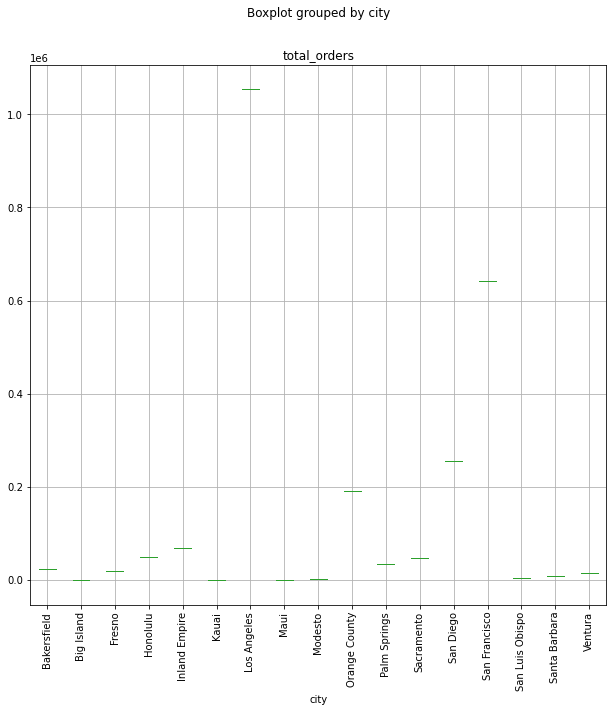

In [43]:
boxplot1 = df5.boxplot(column=['total_orders'],by="city", rot=90)

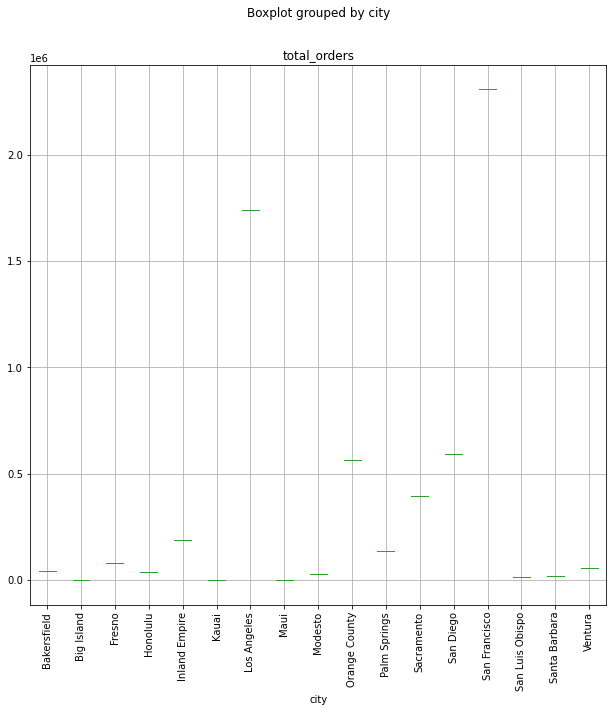

In [42]:
boxplot2 = df4.boxplot(column=['total_orders'],by="city", rot=90)

In [ ]:
boxplot1.compare(boxplo2)

In [30]:
ue_series = df_smb['ubereats']

In [31]:
dd_series = df_smb['doordash']

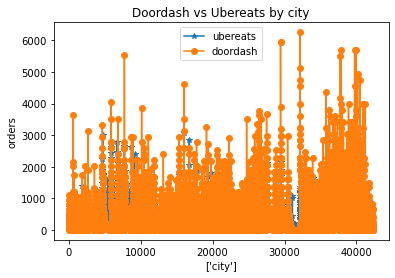

In [78]:
plt.plot(ue_series, marker="*", label=ue_series.name)
plt.plot(dd_series, marker="o", label=dd_series.name)

ax = plt.gca()
plt.title('Doordash vs Ubereats by city')
ax.set_xlabel(['city'])
ax.set_ylabel('orders')
plt.legend()

plt.show()

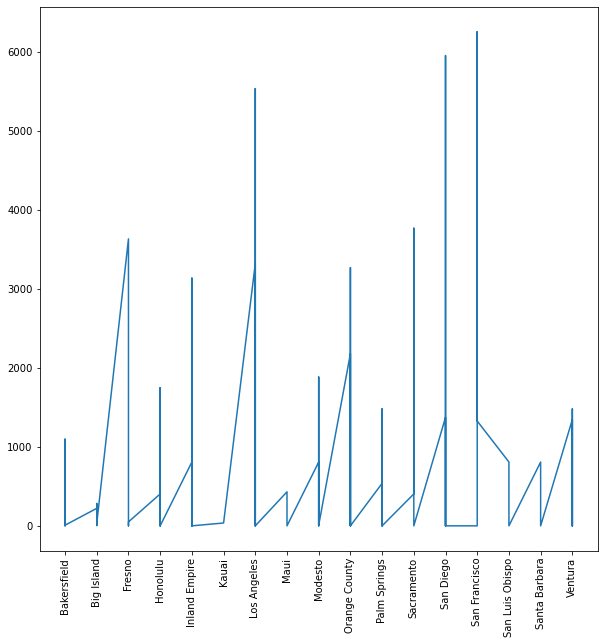

In [34]:
plt.plot(df_smb.city, df_smb.doordash)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (10, 10)

plt.show()

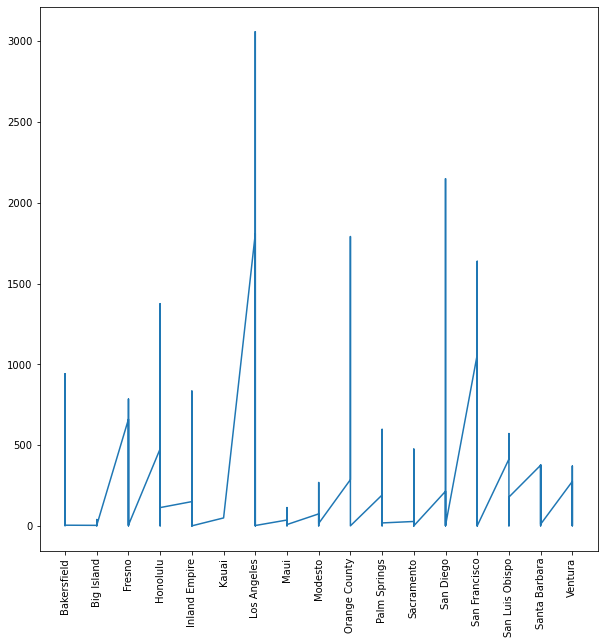

In [35]:
plt.plot(df_smb.city, df_smb.ubereats)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (10, 10)

plt.show()

Totals for SMB vs ENT

In [69]:
total_smb = df_smb['doordash'].sum()
print('The following is the total orders for Doordash in SMB')
print(total_smb)
total_smb1 = df_smb['ubereats'].sum()
print('The following is the total orders for Ubereats in SMB')
print(total_smb1)
total_ent = df_ent['doordash'].sum()
print('The following is the total orders for Doordash in ENT')
print(total_ent)
total_ent1 = df_ent['ubereats'].sum()
print('The following is the total orders for Ubereats in ENT')
print(total_ent1)

The following is the total orders for Doordash in SMB
6206550
The following is the total orders for Ubereats in SMB
2418536
The following is the total orders for Doordash in ENT
6917983
The following is the total orders for Ubereats in ENT
2509746


In [74]:
total_ddorders = df['doordash'].sum()
print('The following is the total orders for doordash')
print(total_ddorders)
total_ueorders = df['ubereats'].sum()
print('The following is the total orders for Ubereats')
print(total_ueorders)

The following is the total orders for doordash
13124533
The following is the total orders for Ubereats
4928282
